# Continuous Control

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the second project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Reacher.app"`
- **Windows** (x86): `"path/to/Reacher_Windows_x86/Reacher.exe"`
- **Windows** (x86_64): `"path/to/Reacher_Windows_x86_64/Reacher.exe"`
- **Linux** (x86): `"path/to/Reacher_Linux/Reacher.x86"`
- **Linux** (x86_64): `"path/to/Reacher_Linux/Reacher.x86_64"`
- **Linux** (x86, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86"`
- **Linux** (x86_64, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86_64"`

For instance, if you are using a Mac, then you downloaded `Reacher.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Reacher.app")
```

In [2]:
# env = UnityEnvironment(file_name='Reacher_One_Linux/Reacher.x86_64')
# env = UnityEnvironment(file_name='Reacher_Linux/Reacher.x86_64')
# env = UnityEnvironment(file_name='Reacher_Linux_NoVis/Reacher.x86_64')
env = UnityEnvironment(file_name='Reacher_Linux_One_NoVis/Reacher.x86_64')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, a double-jointed arm can move to target locations. A reward of `+0.1` is provided for each step that the agent's hand is in the goal location. Thus, the goal of your agent is to maintain its position at the target location for as many time steps as possible.

The observation space consists of `33` variables corresponding to position, rotation, velocity, and angular velocities of the arm.  Each action is a vector with four numbers, corresponding to torque applicable to two joints.  Every entry in the action vector must be a number between `-1` and `1`.

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 1
Size of each action: 4
There are 1 agents. Each observes a state with length: 33
The state for the first agent looks like: [ 0.00000000e+00 -4.00000000e+00  0.00000000e+00  1.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.00000000e+01  0.00000000e+00
  1.00000000e+00 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  5.75471878e+00 -1.00000000e+00
  5.55726671e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
 -1.68164849e-01]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

Of course, as part of the project, you'll have to change the code so that the agent is able to use its experience to gradually choose better actions when interacting with the environment!

In [5]:
random_test = False

if random_test:
    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    while True:
        actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
        actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        scores += env_info.rewards                         # update the score (for each agent)
        states = next_states                               # roll over states to next time step
        if np.any(dones):                                  # exit loop if episode finished
            break
    print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

When finished, you can close the environment.

In [6]:
# Don't close the environment to use it for next experiments
# After close, it is impossible to reload environment on this Unity version.
# env.close()

### 4. Training method

This is implementation of training method for common: DDPG, PPO and others.

#### 4.1. Import modules

In [7]:
import time
import gym
import random
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

#### 4.2. Set device

In [8]:
# Set device between cuda:0 and cpu
torch_device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print('Device =', torch_device)

Device = cuda:0


#### 4.4 Define training method

In [9]:
def train(n_episodes=400, max_t=5000, agents=None, filenames=None,
          benchmark_score=30, rolling_n_episodes=10):
    """Deep Q-Learning.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode (should be over 1000)
        agents (obj): training agent instances
        filenames (list): string of filenames to store weights of actor and critic
        benchmark_score (int): the score of agent should be over this score
        rolling_n_episodes (int): the score is checked whenever number of tries reachs to this
    """
    start_time = time.time()
        
    all_agent_scores = []                             # list containing scores from each episode for all agents
    scores_window = deque(maxlen=rolling_n_episodes)  # last rolling_n_episodes scores
    avg_checked = False
    
    for i_episode in range(1, n_episodes + 1):
        env_info = env.reset(train_mode=True)[brain_name]  # reset the environment
        states = env_info.vector_observations              # get the current state (for each agent)
        scores = np.zeros(len(agents))                     # initialize the score (for each agent)

        for agent in agents:                               # Reset agent before starting new episode
            agent.reset()

        for t in range(max_t):
            actions = [agent.act(states[i]) for i, agent in enumerate(agents)]  # select actions
            env_info = env.step(actions)[brain_name]       # send the action to the environment
            next_states = env_info.vector_observations     # get the next state
            rewards = env_info.rewards                     # get the reward
            dones = env_info.local_done                    # see if episode has finished

            for i, agent in enumerate(agents):
                agent.step(states[i], actions[i], rewards[i], next_states[i], dones[i])
            
            states = next_states                           # roll over the state to next time step
            scores += rewards                              # update the score
            if np.any(dones):                              # exit loop if episode finished
                break

        avg_score = np.mean(scores)                        # average score of all agents
        scores_window.append(avg_score)                    # save most recent score
        all_agent_scores.append(avg_score)                 # save most recent score
        avg_scores_window = np.mean(scores_window)         # get average score of current window

        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, avg_scores_window), end="")
        
        if i_episode % rolling_n_episodes == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, avg_scores_window))
        
        if not avg_checked and avg_scores_window >= benchmark_score:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(
                  i_episode - rolling_n_episodes, avg_scores_window))
            avg_checked = True

    print('\nTraining time = {:.2f}s'.format(time.time() - start_time))
    if filenames:
        agent.store_weights(filenames)

    return all_agent_scores

#### 4.5. Define plot score method

In [10]:
import pandas as pd

def plot_scores(scores, benchmark_score, rolling_n_episodes):
    # plot the scores
    fig = plt.figure()
    ax = fig.add_subplot(111)

    plt.plot(np.arange(len(scores)), scores)
    plt.ylabel('Score')
    plt.xlabel('Episode #')
    ax.axhline(benchmark_score, c="red", alpha=0.5)
    
    rolling_window = rolling_n_episodes
    rolling_mean = pd.Series(scores).rolling(rolling_window).mean()
    plt.plot(rolling_mean, c='yellow', alpha=0.7)
    
    plt.show()

#### 4.6. Hyper-parameters for replay buffer

In [11]:
memory_params = {
    'buffer_size': int(1e6),        # replay buffer size
    'batch_size': 128,              # minibatch size
    'seed': 0,                      # Seed to generate random numbers
}

#### 4.6. Create replay buffer

In [12]:
# Create replay buffer
from replaybuffer import ReplayBuffer

memory = ReplayBuffer(action_size, memory_params['buffer_size'],
                      memory_params['batch_size'], memory_params['seed'], torch_device)

#### 4.6 Test trained agent
Below codes executes on Windows.
It shows agents how to move by training result.

In [13]:
def test(agents, max_t=5000):
    env_info = env.reset(train_mode=False)[brain_name] # reset the environment
    states = env_info.vector_observations              # get the current state
    scores = np.zeros(len(agents))

    for t in range(max_t):
        # select actions
        actions = [agent.act(states[i], add_noise=False) for i, agent in enumerate(agents)]
        env_info = env.step(actions)[brain_name]       # send the action to the environment
        rewards = env_info.rewards                     # get the reward
        dones = env_info.local_done                    # see if episode has finished
        states = env_info.vector_observations          # roll over the state to next time step
        scores += rewards                              # update the score
        if np.any(dones):                              # exit loop if episode finished
            break
    
    print('Score: {:.2f}'.format(np.mean(scores)))

### 5. DDPG
This is implementation of DDPG.

#### 5.1. Set hyper-parameters

In [14]:
params = {
    'gamma': 0.99,                      # discount factor
    'tau': 1e-3,                        # for soft update of target parameters
    'update_every': 1,                  # update parameters per this number
    'lr_actor': 7e-5,                   # learning rate of the Actor
    'lr_critic': 1e-4,                  # learning rate of the Critic
    'seed': 0,                          # Seed to generate random numbers
    'actor_units': [512, 256],          # Number of nodes in hidden layers of the Actor
    'critic_units': [512, 256],         # Number of nodes in hidden layers of the Critic
    'weight_decay': 0,                  # L2 weight decay
    'noise_theta': 0.15,                # Theta of Ornstein-Uhlenbeck process
    'noise_sigma': 0.01,                # Sigma of Ornstein-Uhlenbeck process
}

#### 5.2. Set plot parameters

In [15]:
# Parameters to store and plot scores
rolling_n_episodes = 10     # Score is checked whenever number of tries reachs to this.
benchmark_score = 30.0      # Score of agent should be over this score

#### 5.3. Create agent

In [16]:
from ddpg_agent import DDPGAgent

ddpg_agents = [DDPGAgent(state_size, action_size, memory, torch_device, params)
               for _ in range(num_agents)]

#### 5.4. Training

In [17]:
ddpg_scores = train(300, 5000, ddpg_agents, ["model_ddpg_actor.pth", "model_ddpg_critic.pth"],
                    benchmark_score, rolling_n_episodes)

Episode 10	Average Score: 0.76
Episode 20	Average Score: 1.30
Episode 30	Average Score: 3.72
Episode 40	Average Score: 6.83
Episode 50	Average Score: 10.40
Episode 60	Average Score: 21.16
Episode 70	Average Score: 25.76
Episode 75	Average Score: 31.08
Environment solved in 65 episodes!	Average Score: 31.08
Episode 80	Average Score: 34.17
Episode 90	Average Score: 34.92
Episode 100	Average Score: 38.77
Episode 110	Average Score: 37.47
Episode 120	Average Score: 37.28
Episode 130	Average Score: 36.85
Episode 140	Average Score: 35.41
Episode 150	Average Score: 34.21
Episode 160	Average Score: 31.99
Episode 170	Average Score: 36.90
Episode 180	Average Score: 33.71
Episode 190	Average Score: 35.90
Episode 200	Average Score: 32.09
Episode 210	Average Score: 34.12
Episode 220	Average Score: 36.04
Episode 230	Average Score: 34.46
Episode 240	Average Score: 35.23
Episode 250	Average Score: 33.35
Episode 260	Average Score: 36.43
Episode 270	Average Score: 36.37
Episode 280	Average Score: 35.84
E

#### 5.5. plot scores

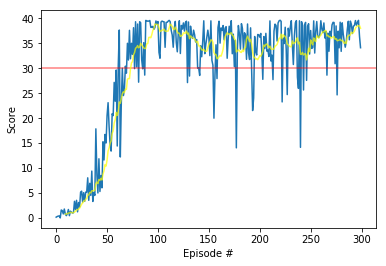

In [18]:
plot_scores(ddpg_scores, benchmark_score, rolling_n_episodes)

#### 5.6. Test

In [19]:
ddpg_agents = [DDPGAgent(state_size, action_size, memory, torch_device, params)
               for _ in range(num_agents)]

for agent in ddpg_agents:
    agent.load_weights(["model_ddpg_actor.pth", "model_ddpg_critic.pth"])

test(ddpg_agents)

Score: 39.51


#### 5.7. Close

In [20]:
env.close()